In [4]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import astropy.io.fits as fits

def loadData(filename):
    '''
    Read fits data
    '''
    tchfits = fits.open(filename)
    tabl = tchfits[1].data
    return tabl



In [5]:
# star/galaxy ratio in a small field of sky
filename = 'sdss_field.fits'
sdss = loadData(filename)

types = sdss.type[0:50]
Nstar = np.sum(types==3)
N = 50
print 'N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar,'d2':np.sum(types==6)}
E_th_y = (Nstar+1.)/(N+2.)
print E_th_y

N_star=28, N_gal=22

0.557692307692


In [6]:
types = sdss.type[0:200]
Nstar = np.sum(types==3)
N = 200
print 'N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar,'d2':np.sum(types==6)}
E_th_y = (Nstar+1.)/(N+2.)
print E_th_y

N_star=126, N_gal=74

0.628712871287


In [7]:
types = sdss.type[0:400]
Nstar = np.sum(types==3)
N = 400
print 'N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar,'d2':np.sum(types==6)}
E_th_y = (Nstar+1.)/(N+2.)
print E_th_y

N_star=270, N_gal=130

0.674129353234


In [8]:
Nstar0 = np.sum(sdss.type==3)
print Nstar0/np.float(len(sdss.type))

0.648522550544


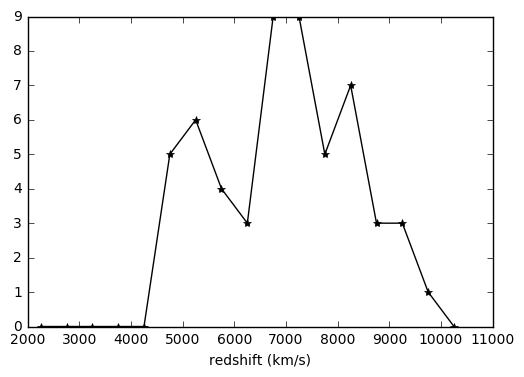

In [30]:
## the mean redshift of Coma cxluster
filename = '/Users/cliu/pyw/Astrostatistics/ComaCluster.fits'
coma = loadData(filename)
cz = coma.czA[coma.czA<10000]

zgrid =np.arange(2000.,11000.,500.)
h, xedge = np.histogram(cz, bins=zgrid)
fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
ax.plot(zgrid[0:-1]+250.,h,'k*-')
ax.set_xlabel('redshift (km/s)')
fig.show()

In [ ]:
## estimate the rotation speed in the solar neighborhood
